In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "anshulgoel131297"   # enter username.
os.environ['KAGGLE_KEY'] = "29c0d73a21d4a2bf81620533754b9ab3"     # enter kaggle key.
#required API command
!kaggle datasets download -d nikitarom/planets-dataset

planets-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from tensorflow.keras import optimizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import pickle

In [3]:
gc.collect()


50

In [4]:
def append_ext(fn):
    return fn + ".jpg"

traindf = pd.read_csv('planet-understanding-the-amazon-from-space/train_v2.csv', dtype=str)
testdf = pd.read_csv('planet-understanding-the-amazon-from-space/sample_submission_v2.csv', dtype=str)

traindf["image_name"] = traindf["image_name"].apply(append_ext)
testdf["image_name"] = testdf["image_name"].apply(append_ext)

datagen = ImageDataGenerator(rescale = 1./255.,
                             validation_split = 0.25,
                             rotation_range = 10,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             brightness_range = [0.2,1.2])

In [5]:
!unzip planets-dataset.zip



Archive:  planets-dataset.zip
replace planet/planet/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N


In [6]:
train_generator = datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = '/content/planet/planet/train-jpg',
    x_col = 'image_name',
    y_col = 'tags',
    subset = 'training',
    batch_size = 340,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = (32, 32))

Found 30360 validated image filenames belonging to 449 classes.


In [7]:
valid_generator = datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = '/content/planet/planet/train-jpg',
    x_col = 'image_name',
    y_col = 'tags',
    subset = 'validation',
    batch_size = 340,
    seed = 42,
    shuffle = True,
    class_mode = 'categorical',
    target_size = (32, 32))

Found 10119 validated image filenames belonging to 449 classes.


In [8]:
test_generator = datagen.flow_from_dataframe(
    dataframe = testdf,
    directory = '/content/planet/planet/test-jpg',
    x_col = 'image_name',
    y_col = None,
    batch_size = 336,
    seed = 42,
    shuffle = False,
    class_mode = None,
    target_size = (32, 32))

Found 40669 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 20522 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [9]:
test_generator2 = datagen.flow_from_dataframe(
    dataframe = testdf,
    directory = '/content/test-jpg-additional/test-jpg-additional',
    x_col = 'image_name',
    y_col = None,
    batch_size = 342,
    seed = 42,
    shuffle = False,
    class_mode = None,
    target_size = (32, 32))

Found 20522 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 40669 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [10]:
model = Sequential()

# model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(4096))
model.add(Dense(4096))
model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(449, activation='softmax'))
opt = optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                        

In [12]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2022-03-22 13:59:30--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.19.142
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2022-03-22 13:59:31--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?z84jz9ZiQSqYb9V_a_2dOI6s9oCOD0ACm0E1IHV0iN3YvUrx9om2S_68_Hn9uFl-vYEpRih8WHxkRHx5IpF7E8xLj6DKPNIWaFSUX7q6JpFmB

In [13]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Wed_Apr_11_23:16:29_CDT_2018
Cuda compilation tools, release 9.2, V9.2.88


In [14]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git


  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-5hapmsx2
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-5hapmsx2
  fatal: remote error:
    The unauthenticated git protocol on port 9418 is no longer supported.
  Please see https://github.blog/2021-09-01-improving-git-protocol-security-github/ for more information.
ERROR: Command errored out with exit status 128: git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-5hapmsx2 Check the logs for full command output.


In [15]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size

train = model.fit(train_generator,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = valid_generator,
          validation_steps = STEP_SIZE_VALID,
          epochs=5)

Epoch 1/5
89/89 [==============================] - 129s 1s/step - loss: 3.7915 - accuracy: 0.2953 - val_loss: 3.0398 - val_accuracy: 0.3378
Epoch 2/5
89/89 [==============================] - 103s 1s/step - loss: 3.0929 - accuracy: 0.3473 - val_loss: 2.8952 - val_accuracy: 0.3791
Epoch 3/5
89/89 [==============================] - 103s 1s/step - loss: 2.8383 - accuracy: 0.3941 - val_loss: 2.8332 - val_accuracy: 0.4046
Epoch 4/5
89/89 [==============================] - 104s 1s/step - loss: 2.7294 - accuracy: 0.4107 - val_loss: 2.8217 - val_accuracy: 0.4261
Epoch 5/5
89/89 [==============================] - 103s 1s/step - loss: 2.6258 - accuracy: 0.4315 - val_loss: 2.4919 - val_accuracy: 0.4458


Text(0, 0.5, 'Accuracy')

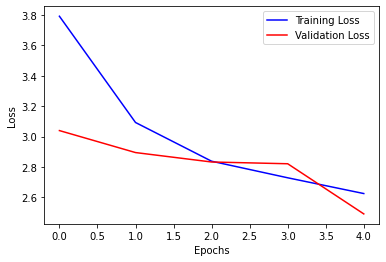

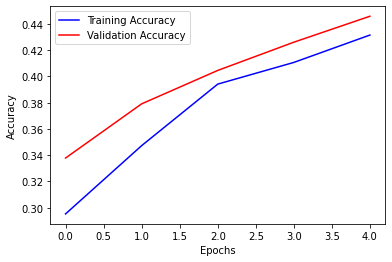

In [16]:
plt.figure()
plt.plot(train.history['loss'], 'blue')
plt.plot(train.history['val_loss'], 'red')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure()
plt.plot(train.history['accuracy'], 'blue')
plt.plot(train.history['val_accuracy'], 'red')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [17]:
model.evaluate(valid_generator, steps=STEP_SIZE_TEST)


121/121 [==============================] - 36s 291ms/step - loss: 2.5065 - accuracy: 0.4450


[2.5065016746520996, 0.4450044333934784]

In [18]:
test_generator.reset()
pred = model.predict(test_generator, steps=STEP_SIZE_TEST, verbose=1)

121/121 [==============================] - 108s 875ms/step


In [19]:
test_generator2.reset()
pred2 = model.predict(test_generator2, steps=STEP_SIZE_TEST, verbose=1)

121/121 [==============================] - 54s 429ms/step


In [20]:
predicted_class_indices = np.argmax(pred, axis=1)
predicted_class_indices2 = np.argmax(pred2, axis=1)

labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames = test_generator.filenames
predict = pd.DataFrame(predictions, columns=['tags'])
filename = pd.DataFrame(filenames, columns=['image_name'])[:40669]

In [21]:
labels2 = (train_generator.class_indices)
labels2 = dict((v, k) for k, v in labels2.items())
predictions2 = [labels2[k] for k in predicted_class_indices2]

filenames = test_generator2.filenames
predict2 = pd.DataFrame(predictions2, columns=['tags'])
filename2 = pd.DataFrame(filenames, columns=['image_name'])

# saving predictions to csv file
results = pd.concat([filename, predict], axis=1)
results2 = pd.concat([filename2, predict2], axis=1)
final_result = pd.concat([results, results2])

In [23]:
final_result
final_result.to_csv("/content/final-results8.csv", index=False)